# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, on = ['Mouse ID'])
# Display the data table for preview
timepoint_mouse_study_df = mouse_study_df.sort_values(['Timepoint', 'Tumor Volume (mm3)'])
new_timepoint_mouse_study_df = timepoint_mouse_study_df.reset_index(drop = True)
new_timepoint_mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
new_timepoint_mouse_study_df['Mouse ID'].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseID_timepoint = new_timepoint_mouse_study_df[new_timepoint_mouse_study_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mouseID_timepoint


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
new_timepoint_mouse_study_df[new_timepoint_mouse_study_df['Mouse ID'] == duplicate_mouseID_timepoint[0]]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
108,g989,0,45.000000,0,Propriva,Female,21,26
435,g989,5,47.570392,0,Propriva,Female,21,26
469,g989,5,48.786801,0,Propriva,Female,21,26
661,g989,10,49.880528,0,Propriva,Female,21,26
697,g989,10,51.745156,0,Propriva,Female,21,26
847,g989,15,51.325852,1,Propriva,Female,21,26
892,g989,15,53.442020,0,Propriva,Female,21,26
1066,g989,20,54.657650,1,Propriva,Female,21,26
1079,g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = new_timepoint_mouse_study_df[new_timepoint_mouse_study_df['Mouse ID'] != duplicate_mouseID_timepoint[0]]
    #subset = ['Mouse ID', 'Timepoint'])
clean_mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_df['Mouse ID'].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#tumor_volume = clean_mouse_study_df['Tumor Volume (mm3)']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_mean = clean_mouse_study_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_volume_median = clean_mouse_study_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_volume_variance = clean_mouse_study_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_volume_stdev = clean_mouse_study_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_volume_stderr = clean_mouse_study_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

#summary_stats_df = clean_mouse_study_df.groupby('Drug Regimen')

summary_stats_df = pd.DataFrame({'Mean Tumor Volume': tumor_volume_mean,
                                'Median Tumor Volume': tumor_volume_median,
                                 'Tumor Volume Variance':tumor_volume_variance,
                                 'Tumor Volume Std. Dev.':tumor_volume_stdev,
                                 'Tumor Volume Std. Err.': tumor_volume_stderr
                                })
summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats_df2 = clean_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_df2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

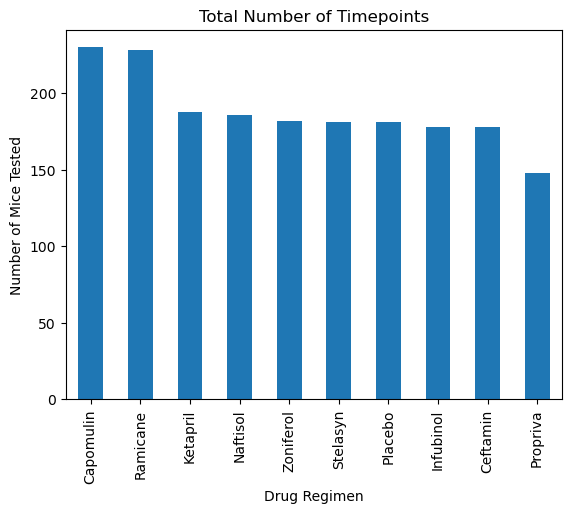

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_count = clean_mouse_study_df['Drug Regimen'].value_counts()
drug_regimen_count.plot(kind="bar")

plt.title("Total Number of Timepoints")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


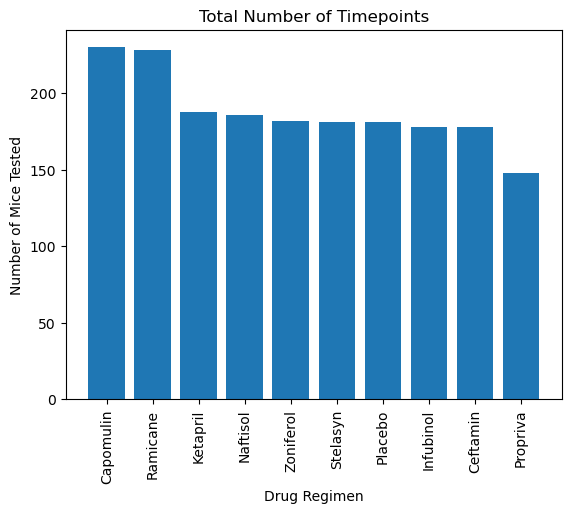

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.title("Total Number of Timepoints")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.bar(drug_regimen_count.index, drug_regimen_count.values, align='center')

# tick_location = [drug for drug in drug_regimen]
plt.xticks(rotation = 90)

plt.show()


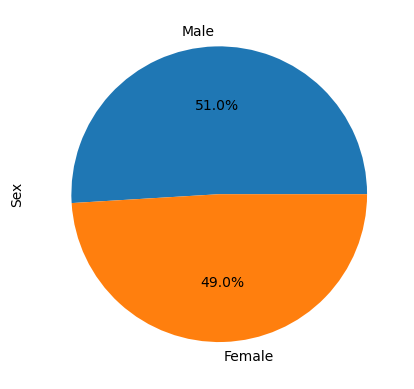

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_regimen_sex = clean_mouse_study_df['Sex'].value_counts()
drug_regimen_sex.plot(kind="pie", autopct="%1.1f%%")
plt.show()


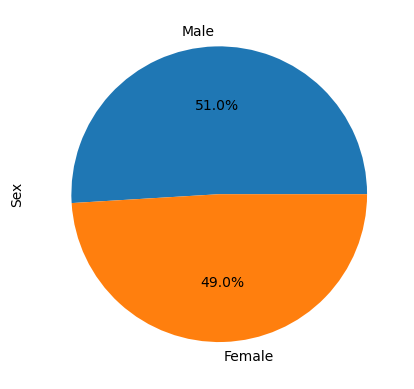

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# plt.title("Sex")
# colors = ['blue', 'orange']
labels = ['Male', 'Female']
# gender = 
plt.pie(drug_regimen_sex, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_timepoint_df = clean_mouse_study_df.groupby(['Mouse ID']).max()[['Timepoint']]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = max_timepoint_df.reset_index()
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max_timepoint_df = pd.merge(max_timepoint_df, clean_mouse_study_df, 
                                   on = ['Mouse ID', 'Timepoint'], how = 'left')
merged_max_timepoint_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_reg_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in drug_reg_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    intermed_df = merged_max_timepoint_df.loc[merged_max_timepoint_df['Drug Regimen'] == drugs]
    tumor_volumes = intermed_df['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25, .50, .75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    
    outliers = tumor_volumes.loc[(tumor_volumes < lower) | (tumor_volumes > upper)]
    print(f'{drugs}: {outliers}')


Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


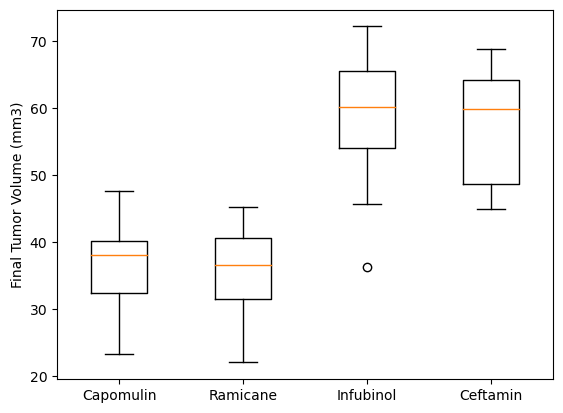

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker = 'o', markerfacecolor = 'r')
plt.boxplot(tumor_vol_data, labels = drug_reg_list)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

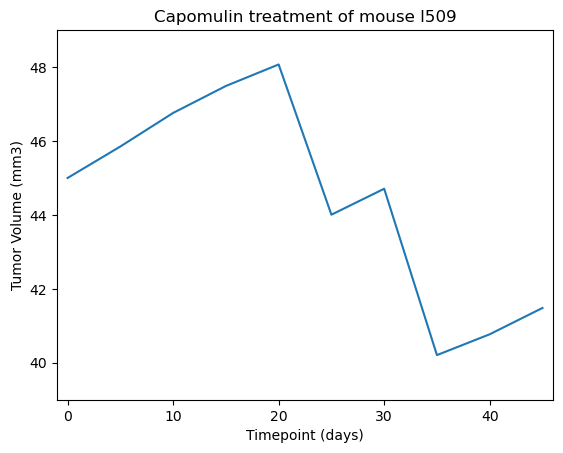

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_df = clean_mouse_study_df[clean_mouse_study_df['Mouse ID'] == 'l509']

plt.plot(l509_df['Timepoint'], l509_df['Tumor Volume (mm3)'])

plt.title("Capomulin treatment of mouse l509")

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(-1, 46)
plt.ylim(39, 49)

plt.show()


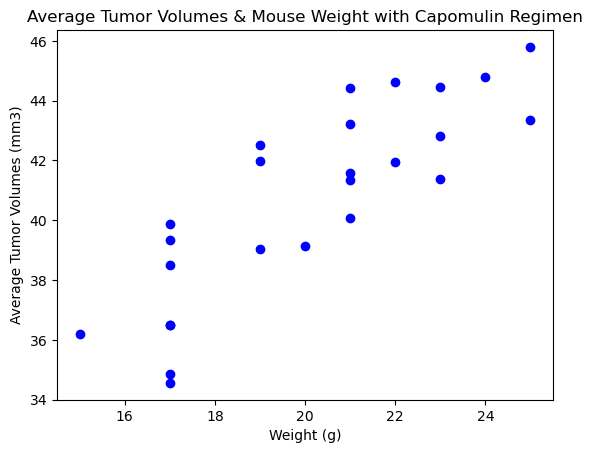

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_df = clean_mouse_study_df[clean_mouse_study_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()

plt.title("Average Tumor Volumes & Mouse Weight with Capomulin Regimen")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volumes (mm3)")

weight = average_df['Weight (g)']
average_tumor_volume = average_df['Tumor Volume (mm3)']

plt.scatter(weight, average_tumor_volume, facecolors='blue', edgecolors='blue')

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


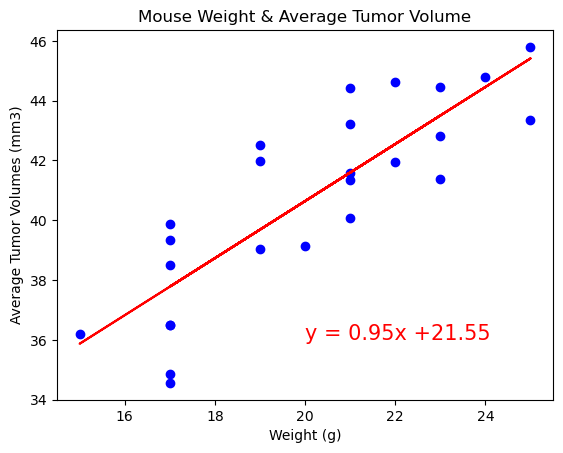

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.title("Mouse Weight & Average Tumor Volume")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volumes (mm3)")

weight = average_df['Weight (g)']
average_tumor_volume = average_df['Tumor Volume (mm3)']

plt.scatter(weight, average_tumor_volume, facecolors='blue', edgecolors='blue')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, average_tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.plot(weight, regress_values, color="red")
plt.show()
